# Neural network structure with only one hidden layer For Planar data classification

**github:ElyarMessi/Deep-Learning**

## 引入必要的包

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline #如果你使用用的是Jupyter Notebook的话请取消注释。

np.random.seed(1) #设置一个固定的随机种子，以保证接下来的步骤中我们的结果是一致的。

UsageError: unrecognized arguments: #如果你使用用的是Jupyter Notebook的话请取消注释。


## 读入数据

In [16]:
X,Y=load_planar_dataset()

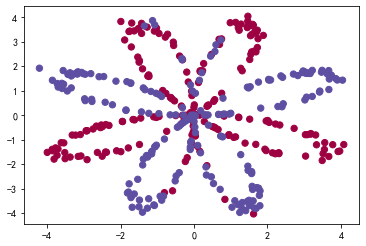

In [17]:
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral)

In [18]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]  # 训练集里面的数量

print ("X的维度为: " + str(shape_X))
print ("Y的维度为: " + str(shape_Y))
print ("数据集里面的数据有：" + str(m) + " 个")

X的维度为: (2, 400)
Y的维度为: (1, 400)
数据集里面的数据有：400 个


In [19]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegressionCV()

逻辑回归的准确性： 47 % (正确标记的数据点所占的百分比)


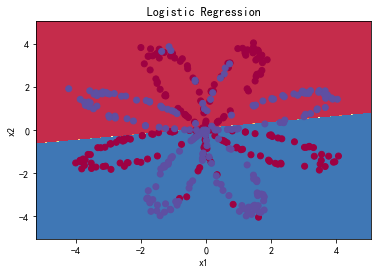

In [20]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y) #绘制决策边界
plt.title("Logistic Regression") #图标题
LR_predictions  = clf.predict(X.T) #预测结果
print ("逻辑回归的准确性： %d " % float((np.dot(Y, LR_predictions) + 
		np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       "% " + "(正确标记的数据点所占的百分比)")

## 开始构建模型

In [21]:
def layer_size(X,Y,hidden_size):
    """
    参数：
     X - 输入数据集,维度为（输入的数量，训练/测试的数量）
     Y - 标签，维度为（输出的数量，训练/测试数量）
     hidden_size - 隐藏层的神经元个数
    返回：
     n_x - 输入层的数量
     n_h - 隐藏层的数量
     n_y - 输出层的数量
    """
    n_x = X.shape[0]
    n_h = hidden_size
    n_y = Y.shape[0]
    
    return (n_x,n_h,n_y)

### 初始化参数

In [22]:
def initialize_parameters(n_x,n_h,n_y):
    """
    参数：
        n_x - 输入层节点的数量
        n_h - 隐藏层节点的数量
        n_y - 输出层节点的数量
    
    返回：
        parameters - 包含参数的字典：
        W1 - 权重矩阵,维度为（n_h，n_x）
        b1 - 偏向量，维度为（n_h，1）
        W2 - 权重矩阵，维度为（n_y，n_h）
        b2 - 偏向量，维度为（n_y，1）

    """
    W1 = np.random.randn(n_h,n_x) * 0.01
    W2 = np.random.randn(n_y,n_h) * 0.01
    b1 = np.zeros(shape=(n_h,1))
    b2 = np.zeros(shape=(n_y,1))
    
    parameters = {
        "W1":W1,
        "W2":W2,
        "b1":b1,
        "b2":b2
    }
    
    return parameters

In [23]:
print("=========================测试initialize_parameters=========================")    
parameters = initialize_parameters(2 , 4 , 1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

=========================测试initialize_parameters=========================
W1 = [[ 0.00814343  0.0078047 ]
 [-0.01464054 -0.00154491]
 [-0.00092432 -0.00237875]
 [-0.00755663  0.01851438]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.00209097  0.01555016 -0.00569149 -0.01061797]]
b2 = [[0.]]


### 前向传播

In [24]:
def forward_propagation( X , parameters ):
    """
    参数：
         X - 维度为（n_x，m）的输入数据。
         parameters - 初始化函数（initialize_parameters）的输出
    
    返回：
         !!!A2 - 使用sigmoid()函数计算的第二次激活后的数值
         cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型变量
     """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    
    return cache

### 计算损失函数

In [38]:
def compute_cost(A2,Y):
    """
    计算方程（6）中给出的交叉熵成本，
    
    参数：
         A2 - 使用sigmoid()函数计算的第二次激活后的数值
         Y - "True"标签向量,维度为（1，数量）
    返回：
         成本 - 交叉熵成本给出方程（13）
    """
    m = Y.shape[1]
    cost = -float(1/m * np.sum((1-Y)*np.log(1-A2) + Y*np.log(A2)))
    
    assert(isinstance(cost,float))
    
    return cost

### 反向传播

In [33]:
def backward_propagation(parameters,cache,X,Y):
    """
    使用上述说明搭建反向传播函数。
    
    参数：
     parameters - 包含我们的参数的一个字典类型的变量。
     cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型的变量。
     X - 输入数据，维度为（2，数量）
     Y - “True”标签，维度为（1，数量）
    
    返回：
     grads - 包含W和b的导数一个字典类型的变量。
    """
    m = X.shape[1]
    
    #Z1 = cache['Z1']
    A1 = cache['A1']
    #Z2 = cache['Z2']
    A2 = cache['A2']
    
    W2 = parameters['W2']
    
    dZ2 = A2 - Y
    dW2 = 1/m * (np.dot(dZ2,A1.T))
    db2 = 1/m * np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = 1/m * (np.dot(dZ1,X.T))
    db1 = 1/m * np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {
        "dW2":dW2,
        "db2":db2,
        "dW1":dW1,
        "db1":db1
    }
    
    return grads

### 更新参数

In [28]:
def update_parameters(parameters,grads,learning_rate=0.05):
    """
    使用上面给出的梯度下降更新规则更新参数
    
    参数：
     parameters - 包含参数的字典类型的变量。
     grads - 包含导数值的字典类型的变量。
     learning_rate - 学习速率
    
    返回：
     parameters - 包含更新参数的字典类型的变量。
    """
    
    W1,W2 = parameters["W1"],parameters["W2"]
    b1,b2 = parameters["b1"],parameters["b2"]
    
    dW1,dW2 = grads["dW1"],grads["dW2"]
    db1,db2 = grads["db1"],grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### 整合模型

In [36]:
def nn_model(X,Y,n_h,num_iterations,learning_rate=0.05,print_cost=False):
    """
    参数：
        X - 数据集,维度为（2，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值
    
    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
     """
    n_x,n_h,n_y = layer_size(X,Y,n_h)
    parameters = initialize_parameters(n_x,n_h,n_y)
    for i in range(num_iterations):
        cache = forward_propagation(X,parameters)
        cost = compute_cost(cache['A2'],Y)
        if print_cost and i % 500 == 0:
            print("The cost:",cost)
        grads = backward_propagation(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads,learning_rate=learning_rate)
    
    return parameters

In [34]:
#测试nn_model
print("=========================测试nn_model=========================")
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

=========================测试nn_model=========================


<ipython-input-25-7dbeaddb5003>:12: RuntimeWarning: divide by zero encountered in log
  cost = float(1/m * np.sum((1-Y)*np.log(1-A2) + Y*np.log(A2)))


W1 = [[-4.83890985  1.05702561]
 [-3.47557025  2.82730595]
 [-3.33273763  2.95152944]
 [-4.83902998  1.0569861 ]]
b1 = [[2.41605357]
 [1.74459748]
 [1.71488579]
 [2.41598528]]
W2 = [[-249.2942917  -248.99169189 -248.05130883 -249.30200187]]
b2 = [[-3.21828206]]


D:\Ipython Notebook\Deep Learning\C1_W3_NN_with_one_hidden_layer\planar_utils.py:25: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


### 预测函数

In [35]:
def predict(parameters,X):
    """
    使用学习的参数，为X中的每个示例预测一个类
    
    参数：
		parameters - 包含参数的字典类型的变量。
	    X - 输入数据（n_x，m）
    
    返回
		predictions - 我们模型预测的向量（红色：0 /蓝色：1）
     
     """
    cache = forward_propagation(X,parameters)
    predictions = np.round(cache['A2'])
    
    return predictions

## 模型测试

The cost: 0.6932277997180221
The cost: 0.33320006854009065
The cost: 0.30927309908353684
The cost: 0.3000478663925419
The cost: 0.2944698850479743
The cost: 0.2904443490752411
The cost: 0.2872526902278023
The cost: 0.28457502469860063
The cost: 0.28224536589357946
The cost: 0.28016789232945916
The cost: 0.27828094093627925
The cost: 0.27653588417060604
The cost: 0.2748735556355262
The cost: 0.2731890442583237
The cost: 0.271410978815565
The cost: 0.2697076341844728
The cost: 0.2682077242309066
The cost: 0.26688344229082267
The cost: 0.2656905830611156
The cost: 0.26460578462924494
准确率: 90%


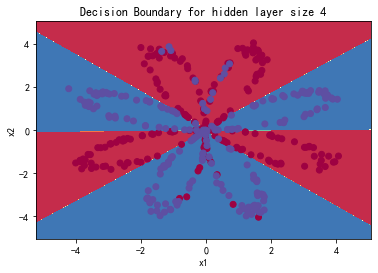

In [39]:
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000,learning_rate=0.5, print_cost=True)

#绘制边界
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

predictions = predict(parameters, X)
print ('准确率: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

### 针对不同隐藏层个数的尝试

隐藏层的节点数量： 5  ，准确率: 91.25 %
隐藏层的节点数量： 10  ，准确率: 91.5 %
隐藏层的节点数量： 20  ，准确率: 91.25 %
隐藏层的节点数量： 50  ，准确率: 91.25 %
隐藏层的节点数量： 100  ，准确率: 90.5 %


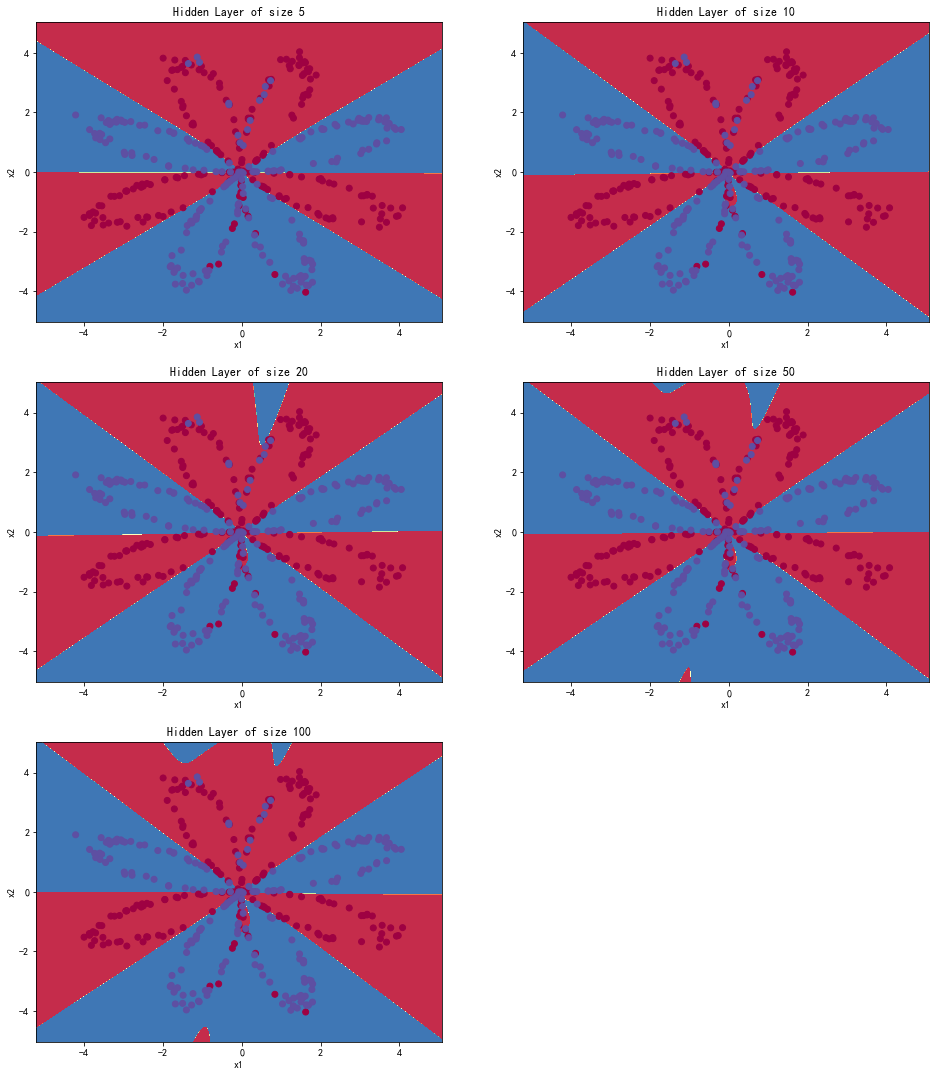

In [42]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [5, 10, 20,50,100] #隐藏层数量
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h,learning_rate=0.5, num_iterations=10000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("隐藏层的节点数量： {}  ，准确率: {} %".format(n_h, accuracy))